In [165]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    classification_report)

In [166]:
pd.set_option('display.max_rows', 200)

In [167]:
def get_max_emotion_score_df(file, emotion_col, emotion_count_col):
    df = pd.read_csv(file)
    df[emotion_col] = df[['joy','sadness','anger','love','thankfulness','fear']].idxmax(axis=1)
    df[emotion_count_col] = df[emotion_col].groupby(df[emotion_col]).transform(emotion_count_col)
    return df

In [168]:
def display_bar_chart(df, emotion_col, emotion_count_col):
    emotions = df[emotion_col].unique()
    emotions_count = []
    for emotion in emotions:
        emotions_count.append(df[df[emotion_col]==emotion][:1][emotion_count_col].item())
    # for emotion, count in zip(emotions, emotions_count):
    #    print(f"{emotion}: {count}")
    data_tuples = list(zip(emotions, emotions_count))
    df = pd.DataFrame(data_tuples, columns=['emotions','count'])
    plt.figure(figsize=(10,5))
    g = sns.barplot(x='emotions', y='count', data=df.sort_values('emotions'))

## Original Dataset

In [169]:
og_df = pd.read_csv("C://Users/ksriniv2/Desktop/bigdata/Magic_Fishbone_DataSet.csv")
og_df["count"] = og_df["emotions"].groupby(og_df["emotions"]).transform("count")
og_df.head()

,text,emotions,count
0,“What a Trot you are! I couldn’t have done it ...,anger,7
1,"The Princess Alicia, who happened to be lookin...",sadness,7
2,I am sick of your grown-up reasons.,anger,7
3,"They jumped for joy when they heard that, and ...",joy,15
4,"“What have you been doing, Alicia?” “Cooking a...",joy,15


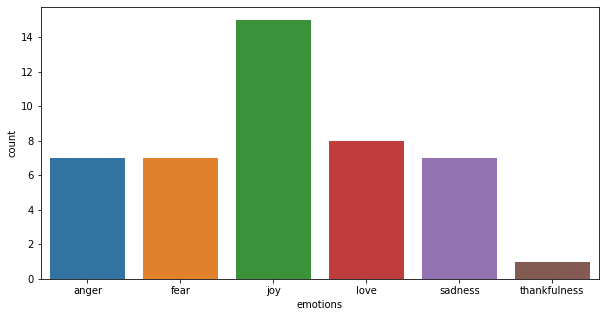

In [170]:
display_bar_chart(og_df, emotion_col="emotions", emotion_count_col="count")

## Predicted Dataset

In [171]:
df = pd.read_csv("C://Users/ksriniv2/Downloads/Magic_Fishbone_DataSetCsv results.csv")
df.head()

,text,joy,sadness,anger,love,thankfulness,fear
0,"The Princess Alicia, who happened to be lookin...",0.097,0.961,0.686,0.966,0.982,0.049
1,I am sick of your grown-up reasons.,0.564,0.705,0.584,0.176,0.327,0.839
2,"They jumped for joy when they heard that, and ...",0.457,0.230,0.755,0.393,0.374,0.181
3,"�What have you been doing, Alicia?� �Cooking a...",0.822,0.915,0.048,0.749,0.665,0.085
4,"By and by the broth was done, and the baby wok...",0.607,0.057,0.424,0.712,0.991,0.122


In [172]:
pred_df = get_max_emotion_score_df(file="C://Users/ksriniv2/Downloads/Magic_Fishbone_DataSetCsv results.csv",
                             emotion_col="emotions",
                             emotion_count_col="count")
pred_df.head()

,text,joy,sadness,anger,love,thankfulness,fear,emotions,count
0,"The Princess Alicia, who happened to be lookin...",0.097,0.961,0.686,0.966,0.982,0.049,thankfulness,18
1,I am sick of your grown-up reasons.,0.564,0.705,0.584,0.176,0.327,0.839,fear,2
2,"They jumped for joy when they heard that, and ...",0.457,0.230,0.755,0.393,0.374,0.181,anger,7
3,"�What have you been doing, Alicia?� �Cooking a...",0.822,0.915,0.048,0.749,0.665,0.085,sadness,8
4,"By and by the broth was done, and the baby wok...",0.607,0.057,0.424,0.712,0.991,0.122,thankfulness,18


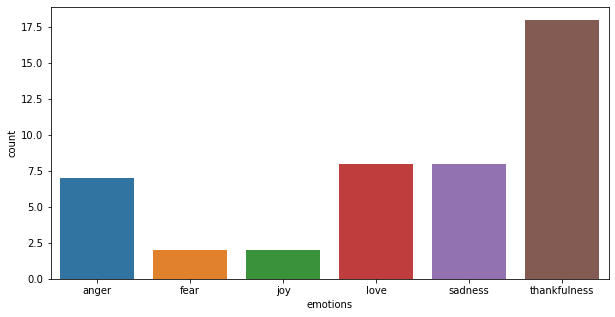

In [173]:
display_bar_chart(pred_df, emotion_col="emotions", emotion_count_col="count")

### Categorize Emotions column (Original dataset)

In [174]:
og_df.dtypes

text        object
emotions    object
count        int64
dtype: object

In [175]:
og_df["emotions"] = og_df["emotions"].astype('category')

In [176]:
category_dict = dict(sorted(zip(og_df.emotions.cat.codes, og_df.emotions)))

In [177]:
for k, v in category_dict.items(): print(k, v)

0 anger
1 fear
2 joy
3 love
4 sadness
5 thankfulness


In [178]:
og_df.dtypes

text          object
emotions    category
count          int64
dtype: object

In [179]:
og_df["emotions_cat"] = og_df["emotions"].cat.codes
og_df.head()

,text,emotions,count,emotions_cat
0,“What a Trot you are! I couldn’t have done it ...,anger,7,0
1,"The Princess Alicia, who happened to be lookin...",sadness,7,4
2,I am sick of your grown-up reasons.,anger,7,0
3,"They jumped for joy when they heard that, and ...",joy,15,2
4,"“What have you been doing, Alicia?” “Cooking a...",joy,15,2


### Categorize Emotions column (Predicted dataset)

In [180]:
pred_df.dtypes

text             object
joy             float64
sadness         float64
anger           float64
love            float64
thankfulness    float64
fear            float64
emotions         object
count             int64
dtype: object

In [181]:
pred_df["emotions"] = pred_df["emotions"].astype('category')

In [182]:
category_dict = dict(sorted(zip(pred_df.emotions.cat.codes, pred_df.emotions)))

In [183]:
for k, v in category_dict.items(): print(k, v)

0 anger
1 fear
2 joy
3 love
4 sadness
5 thankfulness


In [184]:
pred_df.dtypes

text              object
joy              float64
sadness          float64
anger            float64
love             float64
thankfulness     float64
fear             float64
emotions        category
count              int64
dtype: object

In [185]:
pred_df["emotions_cat"] = pred_df["emotions"].cat.codes
pred_df.head()

,text,joy,sadness,anger,love,thankfulness,fear,emotions,count,emotions_cat
0,"The Princess Alicia, who happened to be lookin...",0.097,0.961,0.686,0.966,0.982,0.049,thankfulness,18,5
1,I am sick of your grown-up reasons.,0.564,0.705,0.584,0.176,0.327,0.839,fear,2,1
2,"They jumped for joy when they heard that, and ...",0.457,0.230,0.755,0.393,0.374,0.181,anger,7,0
3,"�What have you been doing, Alicia?� �Cooking a...",0.822,0.915,0.048,0.749,0.665,0.085,sadness,8,4
4,"By and by the broth was done, and the baby wok...",0.607,0.057,0.424,0.712,0.991,0.122,thankfulness,18,5


In [186]:
og_df.head()

,text,emotions,count,emotions_cat
0,“What a Trot you are! I couldn’t have done it ...,anger,7,0
1,"The Princess Alicia, who happened to be lookin...",sadness,7,4
2,I am sick of your grown-up reasons.,anger,7,0
3,"They jumped for joy when they heard that, and ...",joy,15,2
4,"“What have you been doing, Alicia?” “Cooking a...",joy,15,2


In [187]:
pred_df.head()

,text,joy,sadness,anger,love,thankfulness,fear,emotions,count,emotions_cat
0,"The Princess Alicia, who happened to be lookin...",0.097,0.961,0.686,0.966,0.982,0.049,thankfulness,18,5
1,I am sick of your grown-up reasons.,0.564,0.705,0.584,0.176,0.327,0.839,fear,2,1
2,"They jumped for joy when they heard that, and ...",0.457,0.230,0.755,0.393,0.374,0.181,anger,7,0
3,"�What have you been doing, Alicia?� �Cooking a...",0.822,0.915,0.048,0.749,0.665,0.085,sadness,8,4
4,"By and by the broth was done, and the baby wok...",0.607,0.057,0.424,0.712,0.991,0.122,thankfulness,18,5


## Confusion Matrix

In [188]:
confusion = confusion_matrix(og_df["emotions_cat"], pred_df["emotions_cat"])

In [189]:
confusion

array([[2, 0, 0, 0, 1, 4],
       [1, 0, 0, 1, 1, 4],
       [4, 1, 1, 2, 3, 4],
       [0, 0, 1, 1, 2, 4],
       [0, 1, 0, 4, 0, 2],
       [0, 0, 0, 0, 1, 0]], dtype=int64)

In [190]:
def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=True):
    """
    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix
    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']
    title:        the text to display at the top of the matrix
    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues
    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix by sklearn.metrics.confusion_matrix 
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(10, 7))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(
        accuracy, misclass))
    plt.show()

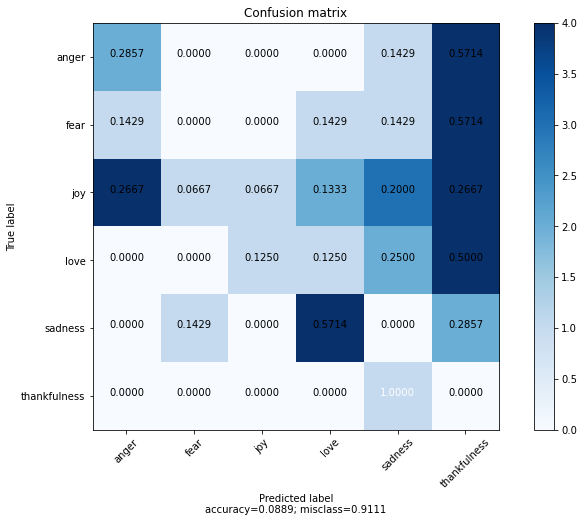

In [191]:
target_names = []
for k, v in category_dict.items(): target_names.append(v)
plot_confusion_matrix(cm=confusion, target_names=target_names, title='Confusion matrix')

### Precision-Recall Report
<div>
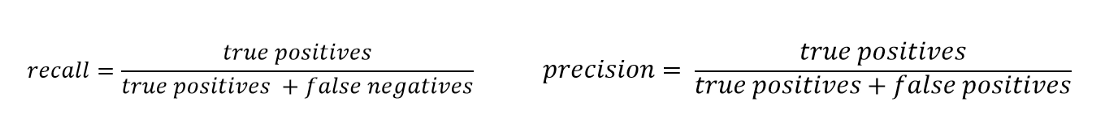
</div>

In [192]:
classes = []
for k, v in category_dict.items(): classes.append(v)
classes

['anger', 'fear', 'joy', 'love', 'sadness', 'thankfulness']

In [193]:
print(classification_report(og_df["emotions_cat"], pred_df["emotions_cat"], target_names=classes))

              precision    recall  f1-score   support

       anger       0.29      0.29      0.29         7
        fear       0.00      0.00      0.00         7
         joy       0.50      0.07      0.12        15
        love       0.12      0.12      0.12         8
     sadness       0.00      0.00      0.00         7
thankfulness       0.00      0.00      0.00         1

    accuracy                           0.09        45
   macro avg       0.15      0.08      0.09        45
weighted avg       0.23      0.09      0.11        45

